# ARMA Models in `statsmodels` - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using statsmodels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

In [3]:
# Preview the dataset
data.head()

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6


Plot this time series data. 

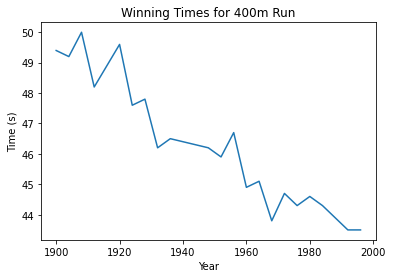

In [6]:
# Plot the time series
fig, ax = plt.subplots()
ax.plot(data)
ax.set_title("Winning Times for 400m Run")
ax.set_xlabel('Year')
ax.set_ylabel('Time (s)');

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [15]:
# Difference the time series

data_diff = data.diff().dropna()

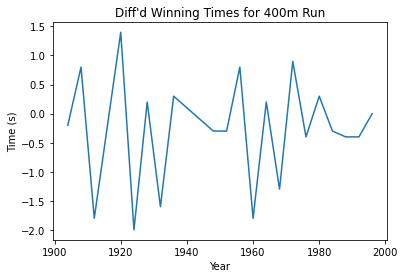

In [16]:
# Plot the time series
fig, ax = plt.subplots()
ax.plot(data_diff)
ax.set_title("Diff'd Winning Times for 400m Run")
ax.set_xlabel('Year')
ax.set_ylabel('Time (s)');

Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

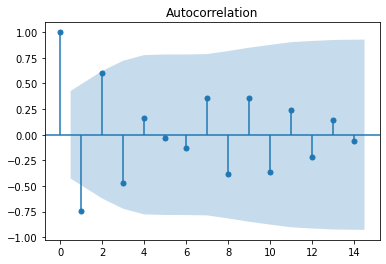

In [39]:
# Plot the ACF
# Import things
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot things
plot_acf(data_diff);

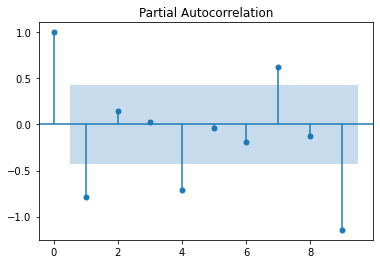

In [40]:
# Plot the PACF
plot_pacf(data_diff, lags=9);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [32]:
# Import things
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [33]:
# baseline model
baseline_model = ARIMA(data, order=(0, 1, 0)).fit()

y_hat_blm = baseline_model.predict(typ='levels')
blm_rmse = np.sqrt(mean_squared_error(data, y_hat_blm))

print(f'Baseline Model AIC: {baseline_model.aic}')
print(f"Baseline Model RMSE: {blm_rmse}")

Baseline Model AIC: 60.39156199682933
Baseline Model RMSE: 10.574820007065274


In [35]:
ar1 = ARIMA(data, order=(1, 1, 0)).fit()

y_hat_ar1 = ar1.predict(typ='levels')
ar1_rmse = np.sqrt(mean_squared_error(data, y_hat_ar1))

print(f'AR1 Model AIC: {ar1.aic}')
print(f"AR1 Model RMSE: {ar1_rmse}")

AR1 Model AIC: 53.45375469497276
AR1 Model RMSE: 10.55953930580741


In [36]:
ar4 = ARIMA(data, order=(1, 1, 4)).fit()

y_hat_ar4 = ar4.predict(typ='levels')
ar4_rmse = np.sqrt(mean_squared_error(data, y_hat_ar4))

print(f'AR4 Model AIC: {ar4.aic}')
print(f"AR4 Model RMSE: {ar4_rmse}")

AR4 Model AIC: 52.83684777245518
AR4 Model RMSE: 10.551052193255094


In [37]:
ma = ARIMA(data, order=(0, 1, 1)).fit()

y_hat_ma = ma.predict(typ='levels')
ma_rmse = np.sqrt(mean_squared_error(data, y_hat_ma))

print(f'AR4 Model AIC: {ma.aic}')
print(f"AR4 Model RMSE: {ma_rmse}")

AR4 Model AIC: 58.17855163639498
AR4 Model RMSE: 10.566920474217753


In [44]:
ar = ARIMA(data, order=(1, 1, 2)).fit()

y_hat_ar = ar.predict(typ='levels')
ar_rmse = np.sqrt(mean_squared_error(data, y_hat_ar))

print(f'AR4 Model AIC: {ar.aic}')
print(f"AR4 Model RMSE: {ar_rmse}")

AR4 Model AIC: 49.05162606843192
AR4 Model RMSE: 10.551327051681696


## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 